In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
g_data=pd.read_csv("googleplaystore.csv")

In [3]:
g_data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
g_data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [5]:
g_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


<AxesSubplot:>

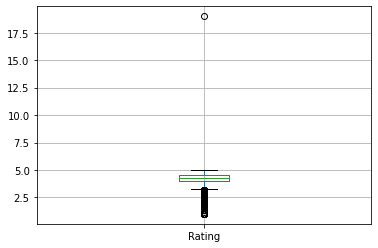

In [6]:
g_data.boxplot()

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

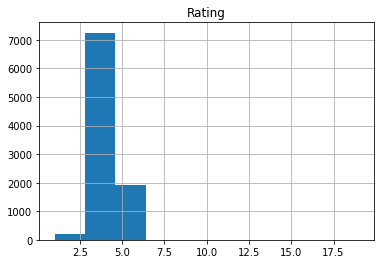

In [7]:
g_data.hist()

In [8]:
g_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
g_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [10]:
g_data[g_data.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
g_data.drop([10472],inplace=True)

In [12]:
g_data[g_data.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

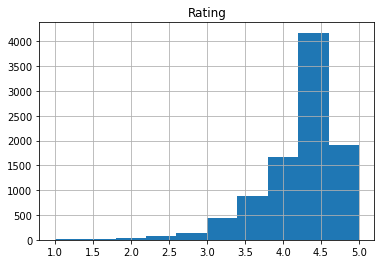

In [13]:
g_data.hist()

In [14]:
threshold=len(g_data)*0.1
threshold

1084.0

In [15]:
g_data.dropna(thresh=threshold,axis=1,inplace=True)


In [16]:
g_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

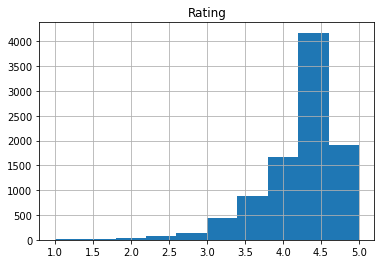

In [17]:
g_data.hist()

### Missing value Imputation

In [18]:
def impute_median(series):
    return series.fillna(series.median())

In [19]:
g_data.Rating=g_data['Rating'].transform(impute_median)

In [20]:
g_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [21]:
g_data["Type"].mode()

0    Free
dtype: object

In [22]:
g_data['Current Ver'].mode()

0    Varies with device
dtype: object

In [23]:
g_data['Android Ver'].mode()

0    4.1 and up
dtype: object

In [24]:
g_data["Type"].fillna(str(g_data['Type'].mode().values[0]),inplace=True)
g_data["Current Ver"].fillna(str(g_data['Current Ver'].mode().values[0]),inplace=True)
g_data["Android Ver"].fillna(str(g_data['Android Ver'].mode().values[0]),inplace=True)

In [25]:
g_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [26]:
g_data['Price']=g_data['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))
g_data['Price']=g_data['Price'].apply(lambda x:float(x))
g_data['Reviews']=pd.to_numeric(g_data['Reviews'],errors='coerce')

In [27]:
g_data['Installs']=g_data['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
g_data['Installs']=g_data['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
g_data['Installs']=g_data['Installs'].apply(lambda x:float(x))

In [28]:
g_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [29]:
g_data.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


## Data Visualization

In [42]:
grp=g_data.groupby('Category')
x=grp["Rating"].agg(np.mean)
y=grp["Price"].agg(np.sum)
z=grp["Reviews"].agg(np.mean)
w=grp["Installs"].agg(np.mean)

In [44]:
print(x)
print(y)
print(z)
print(w)

print(max(w))

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

[]

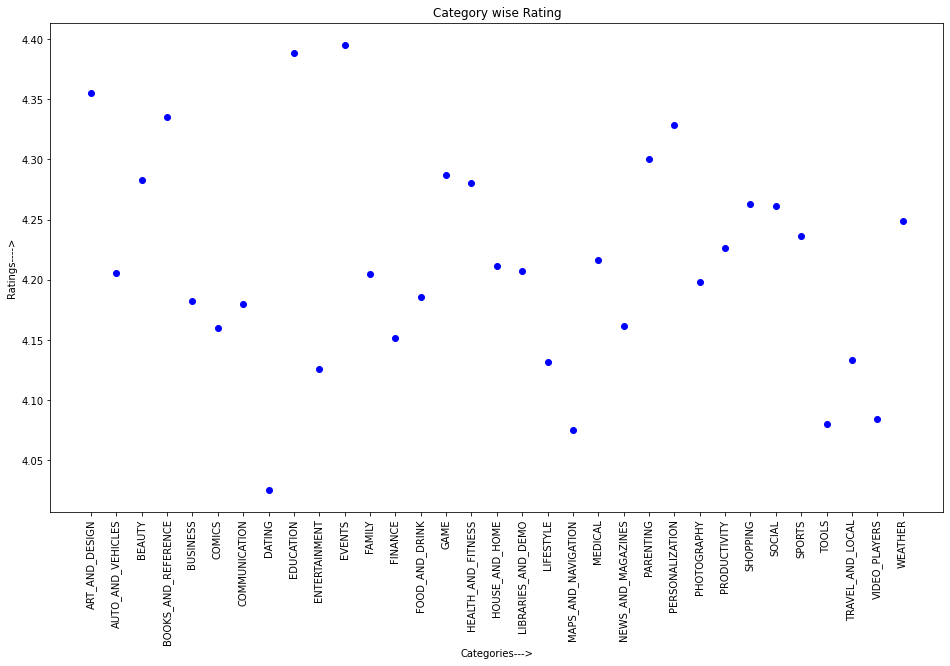

In [38]:
plt.figure(figsize=(16,9))
plt.plot(x,'ro',color='blue')
plt.xticks(rotation=90)
plt.title('Category wise Rating')
plt.xlabel("Categories--->")
plt.ylabel("Ratings---->")
plt.plot()

[]

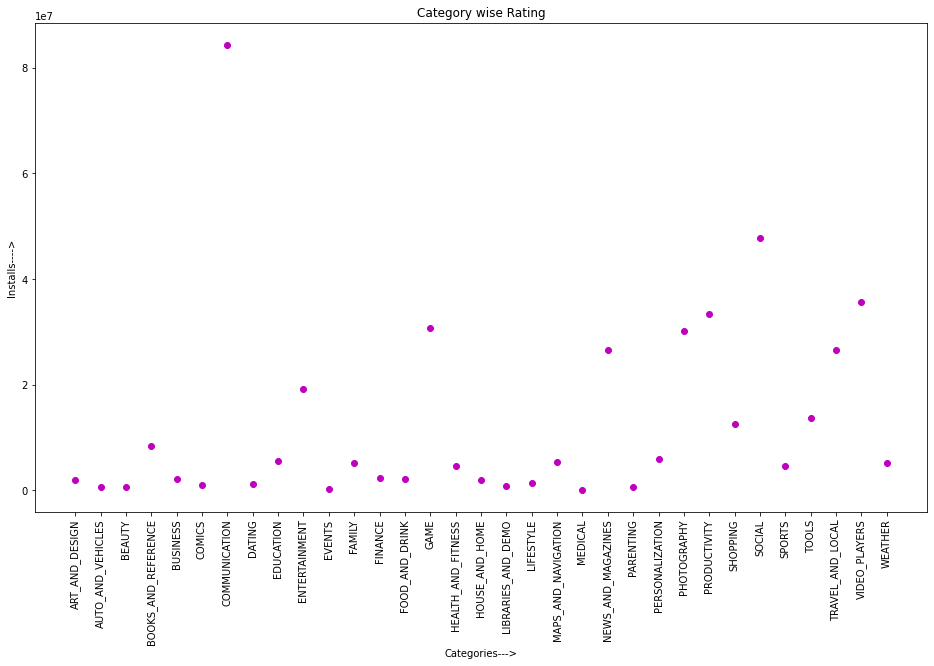

In [54]:
plt.figure(figsize=(16,9))
plt.plot(w,'ro',color='m')
plt.xticks(rotation=90)
plt.title('Category wise Rating')
plt.xlabel("Categories--->")
plt.ylabel("Installs---->")
plt.plot()

[]

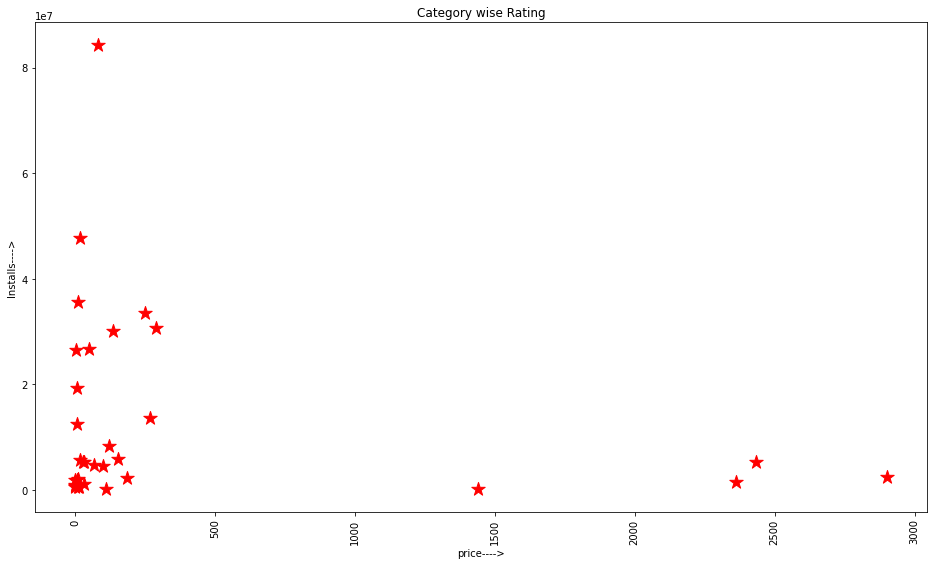

In [50]:
plt.figure(figsize=(16,9))
plt.scatter(y,w,c="r" ,marker="*",s=200)
plt.xticks(rotation=90)
plt.title('Category wise Rating')
plt.xlabel("price---->")
plt.ylabel("Installs---->")
plt.plot()

[]

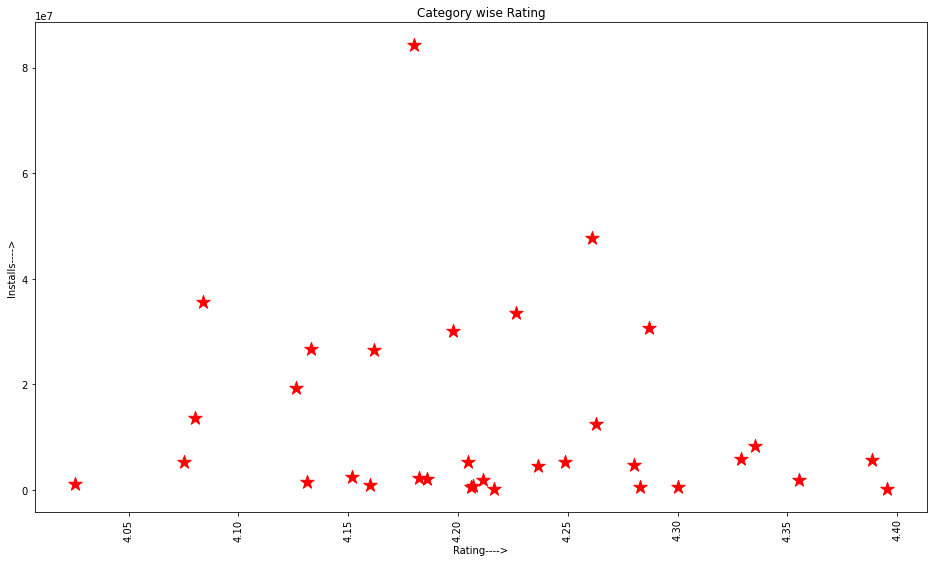

In [56]:
plt.figure(figsize=(16,9))
plt.scatter(x,w,c="r" ,marker="*",s=200)
plt.xticks(rotation=90)
plt.title('Category wise Rating')
plt.xlabel("Rating---->")
plt.ylabel("Installs---->")
plt.plot()

[]

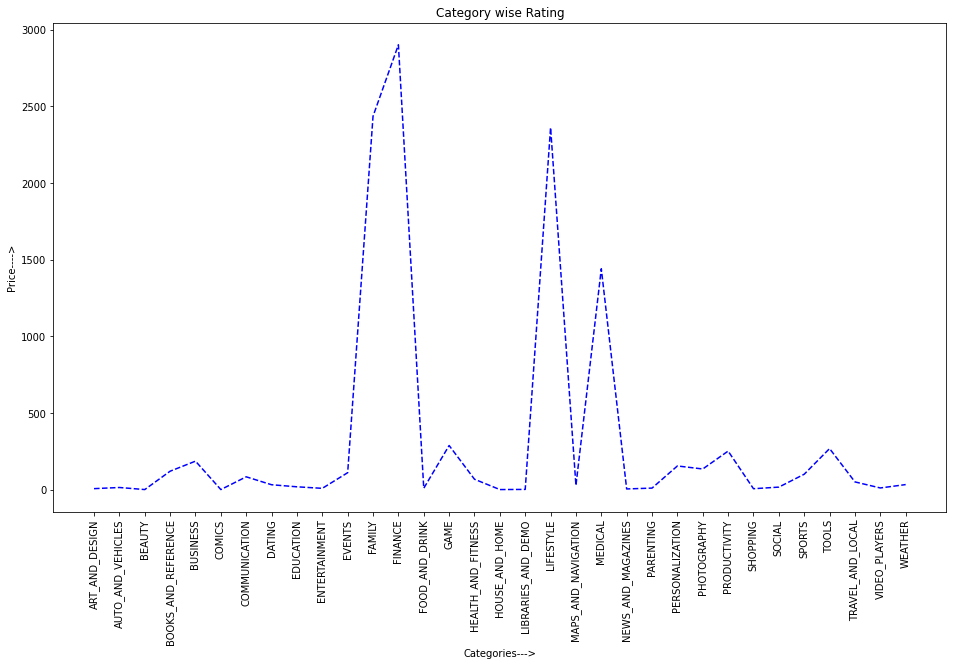

In [59]:
plt.figure(figsize=(16,9))
plt.plot(y,'r--',color='blue')
plt.xticks(rotation=90)
plt.title('Category wise Rating')
plt.xlabel("Categories--->")
plt.ylabel("Price---->")
plt.plot()